42


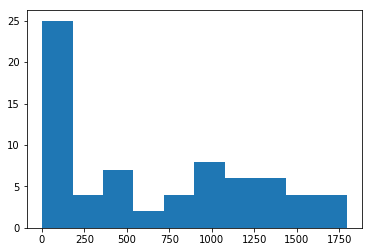

In [49]:
import csv
import sys
from datetime import date
import collections
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    if len(sys.argv)<2:
        sys.stderr.write('USAGE: python %s <INPUT_CSV>\n' % sys.argv[0])
        sys.exit(1)
        
    total = 0
    count = {}

    with open("citibike.csv", 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['usertype']=='Subscriber':
                b_year = row['birth_year']
                count[b_year] = count.get(b_year, 0)+1
                total+=1

    d = collections.OrderedDict(sorted(count.items()))
    plt.hist(d.values())
    median_age = 0
    agg = 0

    for m,a in d.items():
        agg += a
        if agg*2 > total:
            median = m
            median_age = date.today().year - int(median)
            break

    print(median_age)